# A Model of the Reduction of HIV Concentration During Acute Infection

Kristtiya Vachiraseneekul Guerra

In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'


# import functions from the modsim.py module
from modsim import *

In [2]:
######################################################
##              Sets the initial state              ##
##  R = The number of uninfected CD4 lymphocytes    ##
##  L = The number of latently infected cells       ##
##  E = The number of actively infected cells       ##
##  V = The numbber of free virions                 ##
#######################################################

init = State(R = 200, L = 0, E = 0, V = 4e-7)

,values
R,2.000000e+02
L,0.000000e+00
E,0.000000e+00
V,4.000000e-07


In [3]:
system = System(t_0 = 0,       # The initial time, which is 0.
                t_end = 120,   # The end time in days
                gamma = 1.36,  # The rate at which new CD4 lymphocytes arise
                tau = 0.2,     # The proportion that CD4 lymphocytes are activated
                mu = 0.00136,  # Rate of HIV independent death of lymphocytes
                beta = 0.00027,# Infection rate
                rho = 0.1,     # Proportion of cells latently infected
                alpha = 0.036, # Activation rate of latently infected cells
                delta = 0.33,  # Rate of removal of actively infected cells
                pi = 100,      # Production rate of free virions
                sigma = 2,     # Rate of removal of free virions
                dt = 0.1,      # Time steps
                init=init)     # 

,values
t_0,0
t_end,120
gamma,1.36
tau,0.2
mu,0.00136
beta,0.00027
rho,0.1
alpha,0.036
delta,0.33
pi,100


# Euler with explicit dt = 0.1


In [6]:
def run_simulation(system, update_func):
    """Runs a simulation of the system.
        
    system: System object
    update_func: function that updates state
    
    returns: TimeFrame
    """
    unpack(system)
    
    frame = TimeFrame(columns=init.index)
    frame.row[t_0] = init
    
    step = linspace(t_0, t_end, int(t_end /dt)) 
    timesteps = Series(step)
    print(timesteps)
    
    for t in timesteps.index[:-1]:
        frame.row[timesteps[t+1]] = update_func(frame.row[timesteps[t]], dt, system)
    
    return frame

In [7]:
def update_func(state, t, system):
    """Update the HIV model.
    
    state: State(r, l, v, e)
    t: time
    system: System object
    
    returns: State (rlve)
    """
    unpack(system)
    r, l, e, v = state
    

    dl = (rho * beta * r * v) - (mu * l) - (alpha * l)        #The change in latently infected cells
    dr = (gamma * tau) - (mu * r) - (beta * r * v)            #The change in CD4 lymphocytes
    de = (1 - rho) * beta * r * v + (alpha * l) - (delta * e) #The change in actively infected cells
    dv = pi * e - sigma * v                                   #The change in free virions
    
    #The changes are applied to the population of each of the cell types over a time step (dt)
    r += dr * dt  
    l += dl * dt  
    v += dv * dt  
    e += de * dt  
   
    
    return State(R=r, L=l, E=e, V=v)

In [8]:
## Runs the Simulation ##''
results = run_simulation(system, update_func)

0         0.000000
1         0.100083
2         0.200167
3         0.300250
4         0.400334
5         0.500417
6         0.600500
7         0.700584
8         0.800667
9         0.900751
10        1.000834
11        1.100917
12        1.201001
13        1.301084
14        1.401168
15        1.501251
16        1.601334
17        1.701418
18        1.801501
19        1.901585
20        2.001668
21        2.101751
22        2.201835
23        2.301918
24        2.402002
25        2.502085
26        2.602168
27        2.702252
28        2.802335
29        2.902419
           ...    
1170    117.097581
1171    117.197665
1172    117.297748
1173    117.397832
1174    117.497915
1175    117.597998
1176    117.698082
1177    117.798165
1178    117.898249
1179    117.998332
1180    118.098415
1181    118.198499
1182    118.298582
1183    118.398666
1184    118.498749
1185    118.598832
1186    118.698916
1187    118.798999
1188    118.899083
1189    118.999166
1190    119.099249
1191    119.

,R,L,E,V
0.000000,200.000000,0.000000e+00,0.000000e+00,4.000000e-07
0.100083,200.000000,2.160000e-10,1.944000e-09,3.200000e-07
0.200167,200.000000,3.879930e-10,3.435826e-09,2.754400e-07
0.300250,200.000000,5.352811e-10,4.662479e-09,2.547103e-07
0.400334,200.000000,6.708248e-10,5.748436e-09,2.503930e-07
0.500417,200.000000,8.035308e-10,6.778062e-09,2.577987e-07
0.600500,200.000000,9.397402e-10,7.810181e-09,2.740196e-07
0.700584,200.000000,1.084200e-09,8.887563e-09,2.973175e-07
0.800667,200.000000,1.240701e-09,1.004314e-08,3.267296e-07
0.900751,200.000000,1.412500e-09,1.130409e-08,3.618151e-07


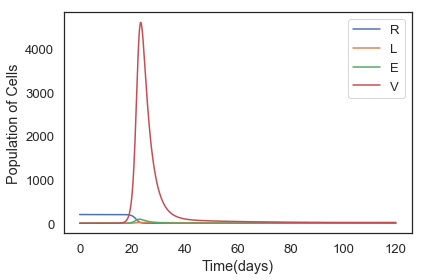

In [9]:
results.plot()
decorate(xlabel='Time(days)', ylabel='Population of Cells')

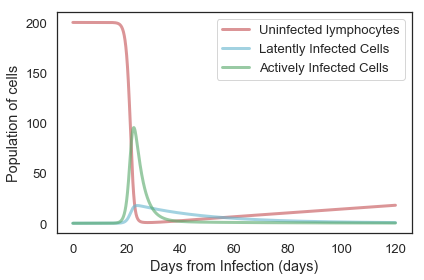

In [10]:
plot(results.R, '-r', label='Uninfected lymphocytes')
plot(results.L, '-c', label='Latently Infected Cells')
plot(results.E, '-g', label='Actively Infected Cells')

decorate(xlabel='Days from Infection (days)', ylabel='Population of cells')